<a href="https://colab.research.google.com/github/yu-hyeri/Data_analysis/blob/main/Correlation_Between_APT_Sales_And_Rentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 서울 성동구&강남구 아파트의 전세 지수와 매매 지수의 상관관계
# 2019년부터 2024년까지 서울 성동구와 강남구의 아파트 매매 가격과 전세 가격이 얼마나 달라졌는지 시계열 그래프와 회귀 모델을 통해 자세하게 분석해 봤습니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#글꼴 에러 해결 코드 - 1
!apt-get update -qq
!apt-get install -qq fonts-nanum

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
^C


In [ ]:
#글꼴 에러 해결 코드 - 2
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

# Add font and rebuild cache
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
# Rebuild is automatically triggered when adding a font in current versions

# Set font
plt.rc('font', family='NanumGothic')

In [ ]:
# 전세지수 데이터
jeonse = pd.read_csv('/content/drive/MyDrive/개떡찰떡/DATA/monthly_apt_jeonse.csv')
jeonse.head()

,지역명,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,...,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05
0,전국,82.739433,82.613184,82.517175,82.498353,82.497908,82.550769,82.628244,82.764992,82.931603,...,87.60530908,87.77795417,88.03195608,88.27558841,88.4090321,88.53551052,88.641814,88.805314,88.945806,89.044350
1,서울,78.587992,78.529117,78.552769,78.644545,78.746816,78.933886,79.099898,79.399492,79.681242,...,84.55386904,84.91176,85.44228714,85.97560884,86.3781877,86.76678481,87.008844,87.462183,87.996113,88.360752
2,강북14개구,78.931032,78.868462,78.886007,78.993583,79.074724,79.150134,79.214558,79.363258,79.480687,...,85.00666641,85.13883057,85.4876509,85.88213948,86.18450754,86.52661081,86.731478,87.210527,87.793347,88.193773
3,종로구,83.602818,83.51364,83.51364,83.535077,83.707085,83.707145,83.863709,83.936728,83.967058,...,89.81269962,90.17090214,90.48218735,91.01523991,91.81276627,92.39096325,92.680702,93.120846,93.607515,93.887104
4,중구,84.005742,84.005742,84.003095,84.005742,84.005742,84.005742,83.930472,83.999535,84.00879,...,85.27879979,85.41519733,85.64796028,85.87205302,86.3817525,86.92301828,87.248875,88.097229,88.972821,89.541728


In [ ]:
# 강남구,성동구 데이터만 가져오기
processed_jeonse = jeonse.query('지역명 in["강남구", "성동구"]')
processed_jeonse

,지역명,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,...,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05
6,성동구,81.454224,81.443945,81.443664,81.625057,81.799353,81.828197,81.928449,82.078993,82.187386,...,86.28418166,86.65124254,86.94418574,87.36092121,87.6478177,88.01673834,88.232170,88.721050,89.576957,89.997745
26,강남구,76.743374,76.64816,76.636227,76.687059,76.826387,77.484499,77.769412,78.65791,79.304564,...,81.43815329,81.7703939,82.23357722,82.8086944,83.22815202,83.62476111,83.944583,84.266718,84.818628,85.264161


In [ ]:
# 2019-12 이전 데이터 제거
processed_jeonse_dropped = processed_jeonse.drop(columns=processed_jeonse.columns[1:8])
processed_jeonse_dropped

,지역명,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,...,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05
6,성동구,82.078993,82.187386,82.202734,82.222013,82.25638,82.265813,82.355565,83.233108,84.346906,...,86.28418166,86.65124254,86.94418574,87.36092121,87.6478177,88.01673834,88.232170,88.721050,89.576957,89.997745
26,강남구,78.65791,79.304564,79.742271,79.985089,80.112433,80.294087,81.085283,82.650809,83.843275,...,81.43815329,81.7703939,82.23357722,82.8086944,83.22815202,83.62476111,83.944583,84.266718,84.818628,85.264161


In [ ]:
# 전세지수 전처리 데이터 csv로 저장
processed_jeonse_dropped.to_csv('processed_jeonse.csv', encoding='utf-8-sig')

In [ ]:
# 데이터 프레임 짧은 이름으로 바꾸기
pj = processed_jeonse_dropped
pj

,지역명,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,...,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05
6,성동구,82.078993,82.187386,82.202734,82.222013,82.25638,82.265813,82.355565,83.233108,84.346906,...,86.28418166,86.65124254,86.94418574,87.36092121,87.6478177,88.01673834,88.232170,88.721050,89.576957,89.997745
26,강남구,78.65791,79.304564,79.742271,79.985089,80.112433,80.294087,81.085283,82.650809,83.843275,...,81.43815329,81.7703939,82.23357722,82.8086944,83.22815202,83.62476111,83.944583,84.266718,84.818628,85.264161


In [ ]:
# 모든 열을 표시
# pd.set_option('display.max_columns', None)
# 모든 행을 표시
# pd.set_option('display.max_rows', None)

In [ ]:
# 표 csv로 저장
pj.to_csv('pj.csv', index=False)

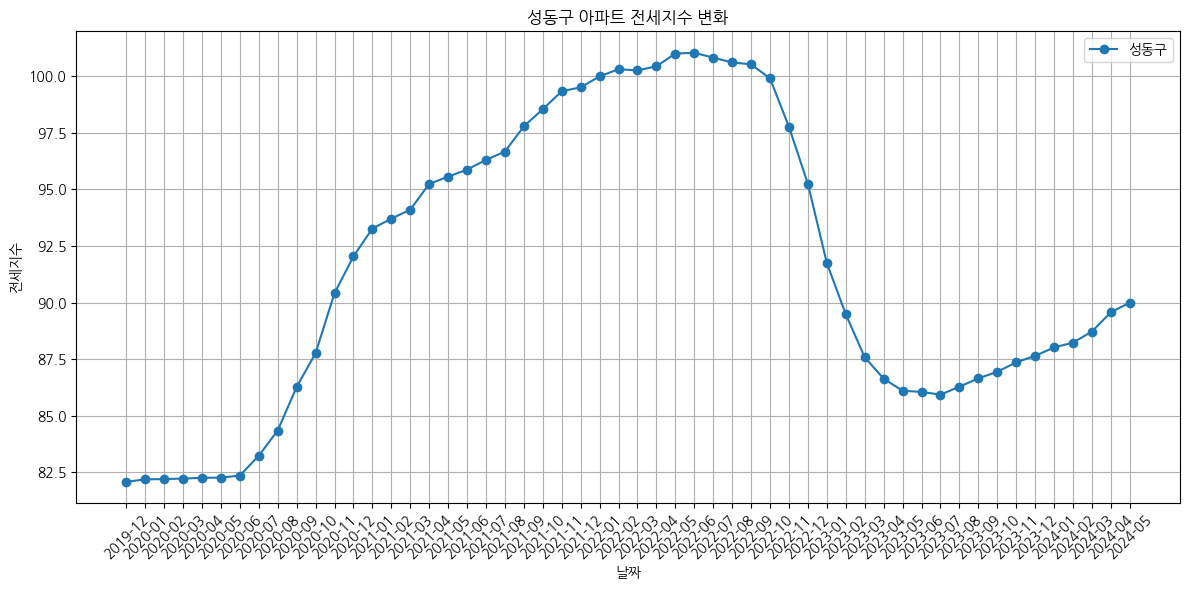

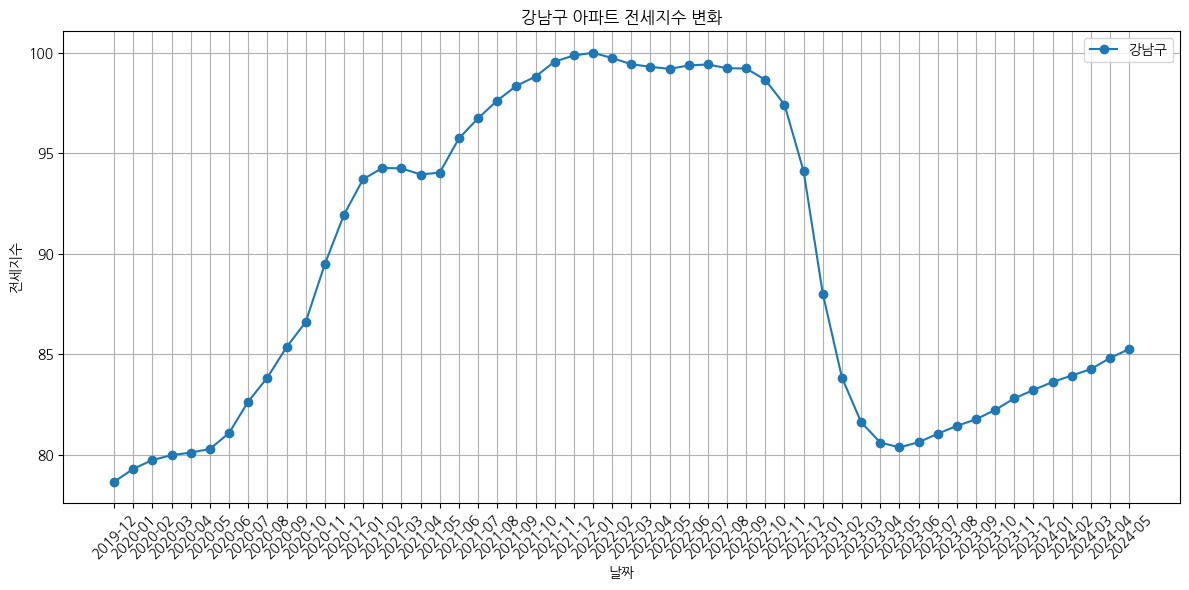

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일에서 데이터 읽어오기
df = pd.read_csv('pj.csv')

# '지역명' 열을 인덱스로 설정
df.set_index('지역명', inplace=True)

# 인덱스를 '성동구'로 선택하여 성동구 데이터만 가져오기
seong_data = df.loc['성동구']

# 인덱스를 날짜 형식으로 변환
date_range = pd.date_range(start='2019-12-01', periods=len(df), freq='M')
df.index = date_range.strftime('%Y-%m')

# 선 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(seong_data.index, seong_data, marker='o', label='성동구')
plt.title('성동구 아파트 전세지수 변화')
plt.xlabel('날짜')
plt.ylabel('전세지수')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# CSV 파일에서 데이터 읽어오기
df = pd.read_csv('pj.csv')

# '지역명' 열을 인덱스로 설정
df.set_index('지역명', inplace=True)

# 인덱스를 '강남구'로 선택하여 강남구 데이터만 가져오기
gang_data = df.loc['강남구']

# 인덱스를 날짜 형식으로 변환
date_range = pd.date_range(start='2019-12-01', periods=len(df), freq='M')
df.index = date_range.strftime('%Y-%m')

# 선 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(gang_data.index, gang_data, marker='o', label='강남구')
plt.title('강남구 아파트 전세지수 변화')
plt.xlabel('날짜')
plt.ylabel('전세지수')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


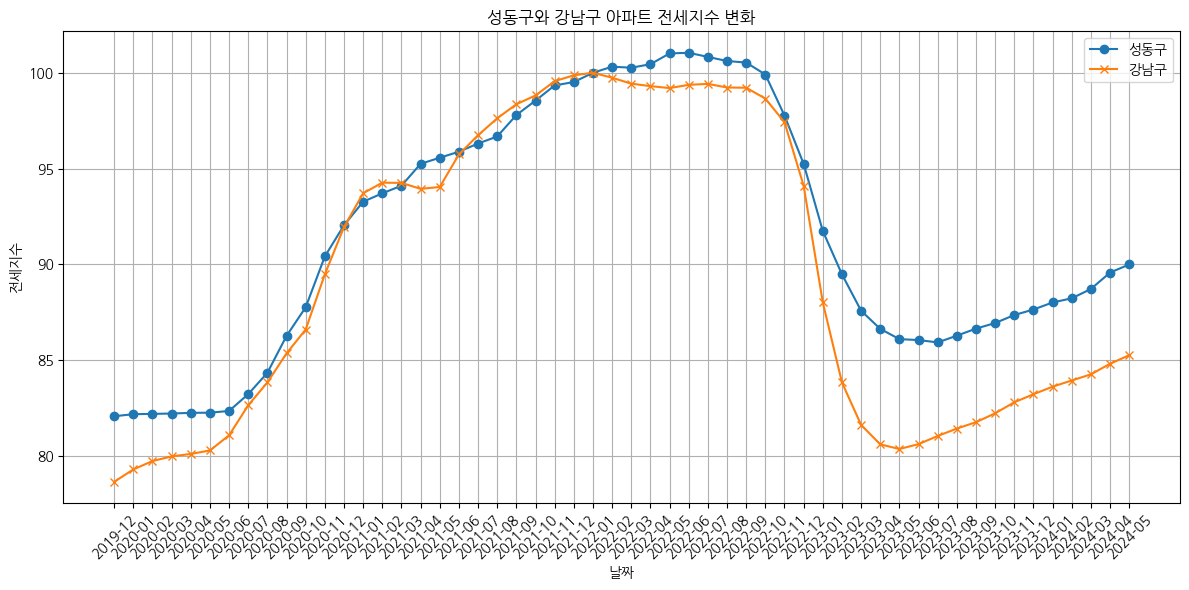

In [ ]:
# 강남구,성동구 전세지수 데이터 선그래프로 그리기

# import pandas as pd
# import matplotlib.pyplot as plt

# CSV 파일에서 데이터 읽어오기
df_j = pd.read_csv('pj.csv')

# '지역명' 열을 인덱스로 설정
df_j.set_index('지역명', inplace=True)

# 성동구와 강남구 데이터 가져오기
seong_data = df_j.loc['성동구']
gang_data = df_j.loc['강남구']

# 인덱스를 날짜 형식으로 변환
date_range = pd.date_range(start='2019-12-01', periods=len(df_j.columns), freq='M')
seong_data.index = date_range.strftime('%Y-%m')
gang_data.index = date_range.strftime('%Y-%m')

# 하나의 그래프에 두 데이터 그리기
plt.figure(figsize=(12, 6))
plt.plot(seong_data.index, seong_data, marker='o', label='성동구')
plt.plot(gang_data.index, gang_data, marker='x', label='강남구')
plt.title('성동구와 강남구 아파트 전세지수 변화')
plt.xlabel('날짜')
plt.ylabel('전세지수')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# 매매지수 데이터
sales = pd.read_csv('/content/drive/MyDrive/개떡찰떡/DATA/processed_sales.csv')
sales

,Unnamed: 0,지역명,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,...,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05
0,6,성동구,79.544484,79.818546,80.027613,80.449372,80.519255,80.552227,80.643149,81.693003,...,90.517531,90.923620,91.231689,91.440464,91.508046,91.432139,91.385790,91.364394,91.548084,91.726678
1,26,강남구,80.960502,81.605938,81.843787,82.002849,81.826479,81.535182,81.775477,83.371632,...,95.993766,96.624532,97.045327,97.245942,97.260064,97.204175,97.183768,97.107117,97.108001,97.224005


In [ ]:
sales.to_csv('sales.csv', index=False)

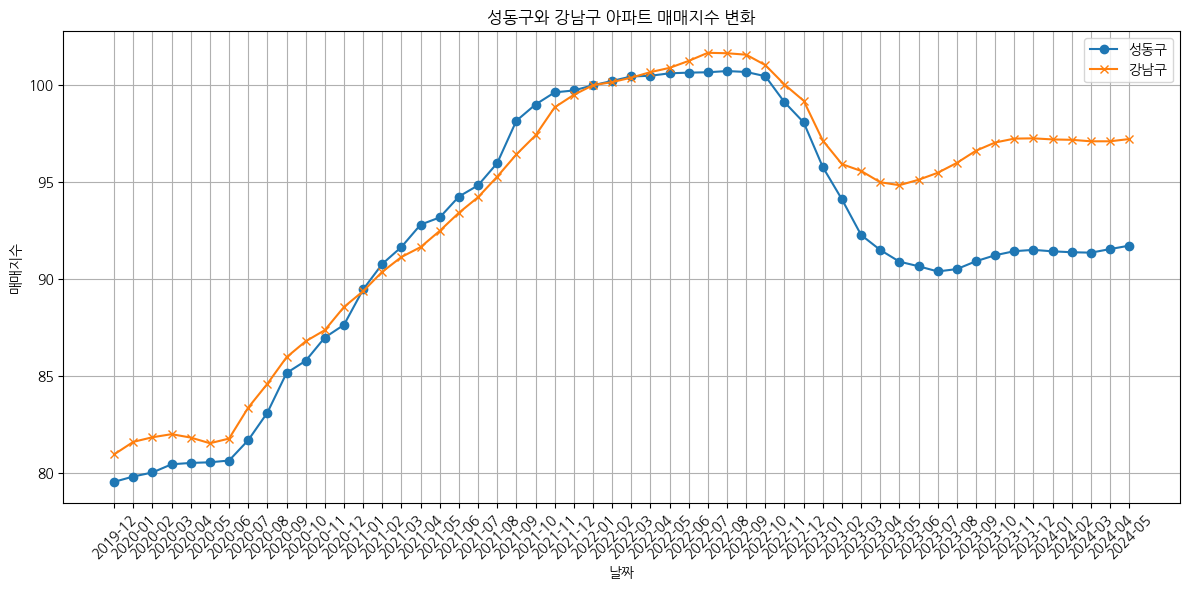

In [ ]:
# 강남구,성동구 매매지수 데이터 선그래프로 그리기

# CSV 파일에서 데이터 읽어오기
df_s = pd.read_csv('sales.csv')

# 첫 번째 열 삭제
df_s.drop(df_s.columns[0], axis=1, inplace=True)

# '지역명' 열을 인덱스로 설정
df_s.set_index('지역명', inplace=True)

# 성동구와 강남구 데이터 가져오기
seong_data = df_s.loc['성동구']
gang_data = df_s.loc['강남구']

# 인덱스를 날짜 형식으로 변환
date_range = pd.date_range(start='2019-12-01', periods=len(df_s.columns), freq='M')
seong_data.index = date_range.strftime('%Y-%m')
gang_data.index = date_range.strftime('%Y-%m')

# 하나의 그래프에 두 데이터 그리기
plt.figure(figsize=(12, 6))
plt.plot(seong_data.index, seong_data, marker='o', label='성동구')
plt.plot(gang_data.index, gang_data, marker='x', label='강남구')
plt.title('성동구와 강남구 아파트 매매지수 변화')
plt.xlabel('날짜')
plt.ylabel('매매지수')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print(df.loc['성동구'].head())
print(df.loc['강남구'].head())

KeyError: '성동구'

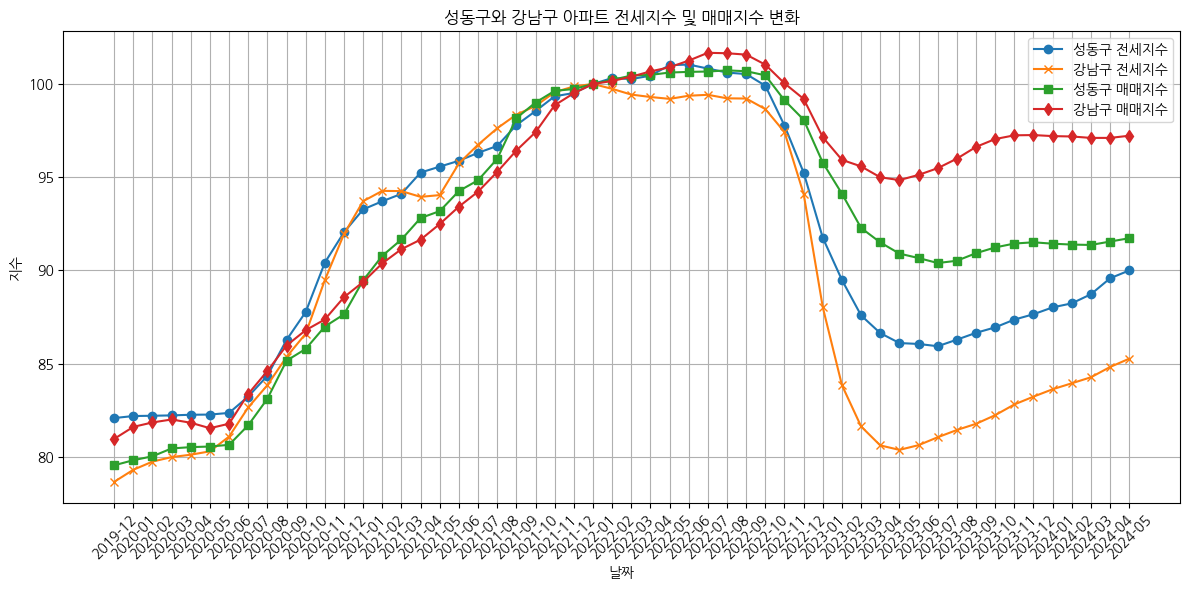

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 전세지수 데이터 읽어오기
df_j = pd.read_csv('pj.csv')

# '지역명' 열을 인덱스로 설정
df_j.set_index('지역명', inplace=True)

# 성동구와 강남구 전세지수 데이터 가져오기
seong_j_data = df_j.loc['성동구']
gang_j_data = df_j.loc['강남구']

# 인덱스를 날짜 형식으로 변환
date_range = pd.date_range(start='2019-12-01', periods=len(df_j.columns), freq='M')
seong_j_data.index = date_range.strftime('%Y-%m')
gang_j_data.index = date_range.strftime('%Y-%m')

# 매매지수 데이터 읽어오기
df_s = pd.read_csv('sales.csv')

# 첫 번째 열 삭제
df_s.drop(df_s.columns[0], axis=1, inplace=True)

# '지역명' 열을 인덱스로 설정
df_s.set_index('지역명', inplace=True)

# 성동구와 강남구 매매지수 데이터 가져오기
seong_s_data = df_s.loc['성동구']
gang_s_data = df_s.loc['강남구']

# 인덱스를 날짜 형식으로 변환
date_range = pd.date_range(start='2019-12-01', periods=len(df_s.columns), freq='M')
seong_s_data.index = date_range.strftime('%Y-%m')
gang_s_data.index = date_range.strftime('%Y-%m')

# 하나의 그래프에 네 데이터 그리기
plt.figure(figsize=(12, 6))
plt.plot(seong_j_data.index, seong_j_data, marker='o', label='성동구 전세지수')
plt.plot(gang_j_data.index, gang_j_data, marker='x', label='강남구 전세지수')
plt.plot(seong_s_data.index, seong_s_data, marker='s', label='성동구 매매지수')
plt.plot(gang_s_data.index, gang_s_data, marker='d', label='강남구 매매지수')
plt.title('성동구와 강남구 아파트 전세지수 및 매매지수 변화')
plt.xlabel('날짜')
plt.ylabel('지수')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


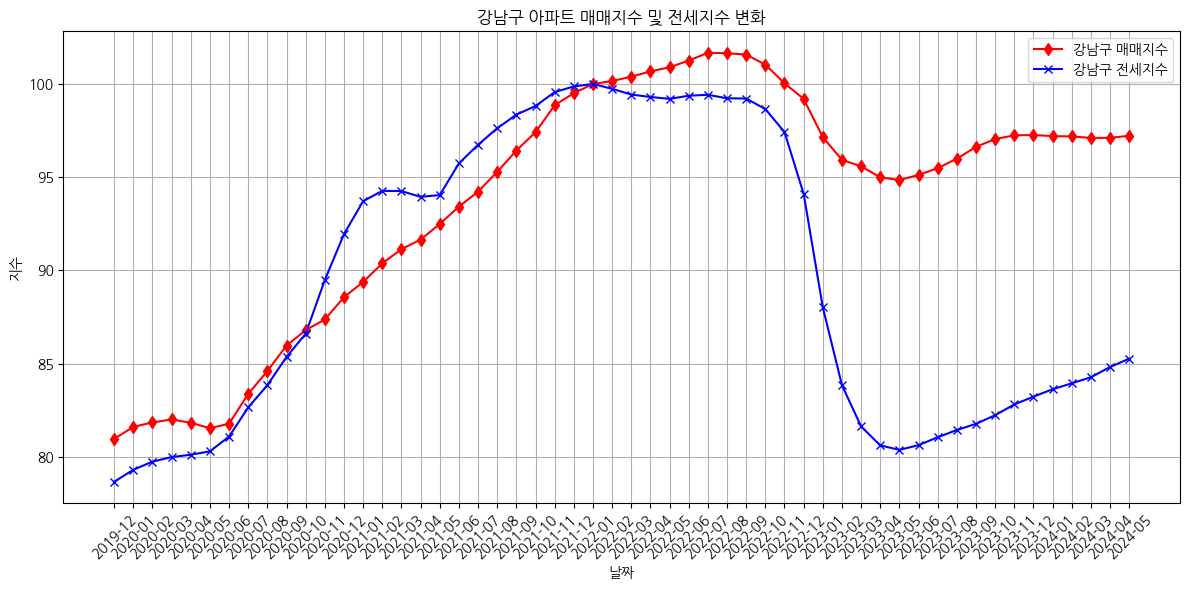

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 전세지수 데이터 읽어오기
df_j = pd.read_csv('pj.csv')

# '지역명' 열을 인덱스로 설정
df_j.set_index('지역명', inplace=True)

# 강남구 전세지수 데이터 가져오기
gang_j_data = df_j.loc['강남구']

# 인덱스를 날짜 형식으로 변환
date_range = pd.date_range(start='2019-12-01', periods=len(df_j.columns), freq='M')
gang_j_data.index = date_range.strftime('%Y-%m')

# 매매지수 데이터 읽어오기
df_s = pd.read_csv('sales.csv')

# 첫 번째 열 삭제
df_s.drop(df_s.columns[0], axis=1, inplace=True)

# '지역명' 열을 인덱스로 설정
df_s.set_index('지역명', inplace=True)

# 강남구 매매지수 데이터 가져오기
gang_s_data = df_s.loc['강남구']

# 인덱스를 날짜 형식으로 변환
date_range = pd.date_range(start='2019-12-01', periods=len(df_s.columns), freq='M')
gang_s_data.index = date_range.strftime('%Y-%m')

# 하나의 그래프에 데이터 그리기
plt.figure(figsize=(12, 6))
plt.plot(gang_s_data.index, gang_s_data, marker='d', label='강남구 매매지수', color='red')
plt.plot(gang_j_data.index, gang_j_data, marker='x', label='강남구 전세지수', color='blue')
plt.title('강남구 아파트 매매지수 및 전세지수 변화')
plt.xlabel('날짜')
plt.ylabel('지수')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


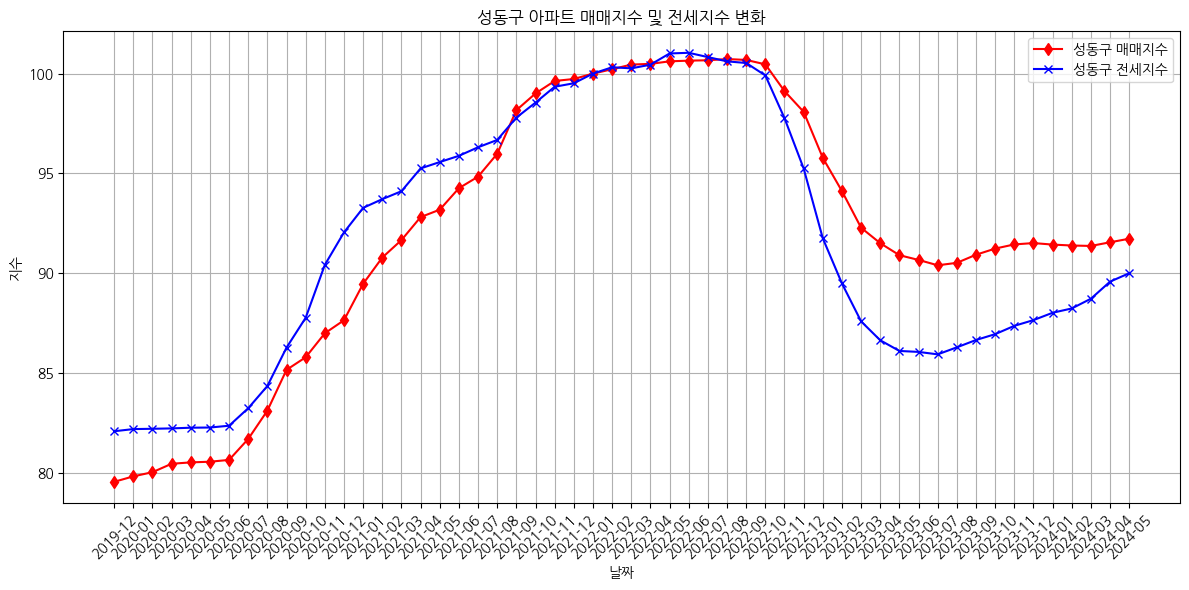

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 전세지수 데이터 읽어오기
df_j = pd.read_csv('pj.csv')

# '지역명' 열을 인덱스로 설정
df_j.set_index('지역명', inplace=True)

# 성동구 전세지수 데이터 가져오기
seong_j_data = df_j.loc['성동구']

# 인덱스를 날짜 형식으로 변환
date_range = pd.date_range(start='2019-12-01', periods=len(df_j.columns), freq='M')
seong_j_data.index = date_range.strftime('%Y-%m')

# 매매지수 데이터 읽어오기
df_s = pd.read_csv('sales.csv')

# 첫 번째 열 삭제
df_s.drop(df_s.columns[0], axis=1, inplace=True)

# '지역명' 열을 인덱스로 설정
df_s.set_index('지역명', inplace=True)

# 성동구 매매지수 데이터 가져오기
seong_s_data = df_s.loc['성동구']

# 인덱스를 날짜 형식으로 변환
date_range = pd.date_range(start='2019-12-01', periods=len(df_s.columns), freq='M')
seong_s_data.index = date_range.strftime('%Y-%m')

# 하나의 그래프에 데이터 그리기
plt.figure(figsize=(12, 6))
plt.plot(seong_s_data.index, seong_s_data, marker='d', label='성동구 매매지수', color='red')
plt.plot(seong_j_data.index, seong_j_data, marker='x', label='성동구 전세지수', color='blue')
plt.title('성동구 아파트 매매지수 및 전세지수 변화')
plt.xlabel('날짜')
plt.ylabel('지수')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

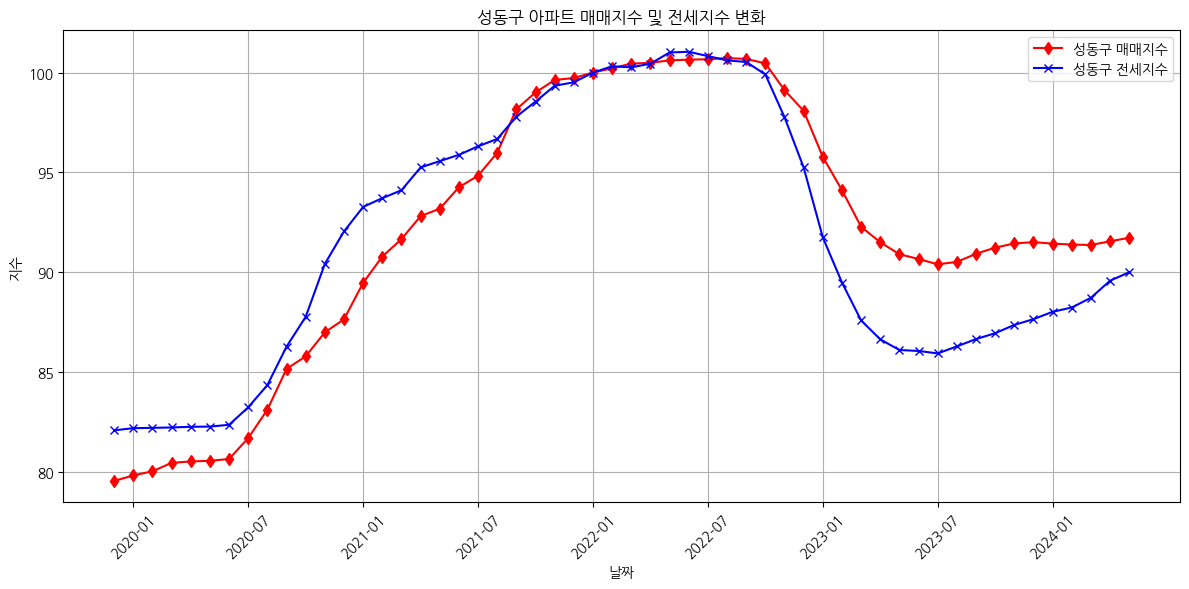

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# 전세지수 데이터 읽어오기
df_j = pd.read_csv('pj.csv')

# '지역명' 열을 인덱스로 설정
df_j.set_index('지역명', inplace=True)

# 성동구 전세지수 데이터 가져오기
seong_j_data = df_j.loc['성동구']

# 인덱스를 날짜 형식으로 변환
date_range = pd.date_range(start='2019-12-01', periods=len(df_j.columns), freq='M')
seong_j_data.index = date_range.strftime('%Y-%m')

# 매매지수 데이터 읽어오기
df_s = pd.read_csv('sales.csv')

# 첫 번째 열 삭제
df_s.drop(df_s.columns[0], axis=1, inplace=True)

# '지역명' 열을 인덱스로 설정
df_s.set_index('지역명', inplace=True)

# 성동구 매매지수 데이터 가져오기
seong_s_data = df_s.loc['성동구']

# 인덱스를 날짜 형식으로 변환
date_range = pd.date_range(start='2019-12-01', periods=len(df_s.columns), freq='M')
seong_s_data.index = date_range.strftime('%Y-%m')

# 하나의 그래프에 데이터 그리기
plt.figure(figsize=(12, 6))
plt.plot(seong_s_data.index, seong_s_data, marker='d', label='성동구 매매지수', color='red')
plt.plot(seong_j_data.index, seong_j_data, marker='x', label='성동구 전세지수', color='blue')
plt.title('성동구 아파트 매매지수 및 전세지수 변화')
plt.xlabel('날짜')
plt.ylabel('지수')

# x축 레이블을 6개월 단위로 설정
xticks = pd.date_range(start='2020-01-01', end=seong_s_data.index[-1], freq='6M').strftime('%Y-%m')
plt.xticks(xticks, rotation=45)

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# 강남구 매매,전세 상관계수 구하기

import pandas as pd

# 전세지수 데이터 읽어오기
df_j = pd.read_csv('pj.csv')

# '지역명' 열을 인덱스로 설정
df_j.set_index('지역명', inplace=True)

# 강남구 전세지수 데이터 가져오기
gang_j_data = df_j.loc['강남구']

# 인덱스를 날짜 형식으로 변환
date_range = pd.date_range(start='2019-12-01', periods=len(df_j.columns), freq='M')
gang_j_data.index = date_range.strftime('%Y-%m')

# 매매지수 데이터 읽어오기
df_s = pd.read_csv('sales.csv')

# 첫 번째 열 삭제
df_s.drop(df_s.columns[0], axis=1, inplace=True)

# '지역명' 열을 인덱스로 설정
df_s.set_index('지역명', inplace=True)

# 강남구 매매지수 데이터 가져오기
gang_s_data = df_s.loc['강남구']

# 인덱스를 날짜 형식으로 변환
date_range = pd.date_range(start='2019-12-01', periods=len(df_s.columns), freq='M')
gang_s_data.index = date_range.strftime('%Y-%m')

# 두 데이터를 하나의 데이터프레임으로 합치기
combined_data = pd.DataFrame({
    '매매지수': gang_s_data,
    '전세지수': gang_j_data
})

# 상관계수 계산
correlation = combined_data.corr()

# 상관계수 출력
print("강남구 매매지수와 전세지수 간의 상관계수:")
print(correlation)


강남구 매매지수와 전세지수 간의 상관계수:
          매매지수      전세지수
매매지수  1.000000  0.593769
전세지수  0.593769  1.000000


In [ ]:
# 성동구 매매,전세 상관계수 구하기

import pandas as pd

# 전세지수 데이터 읽어오기
df_j = pd.read_csv('pj.csv')

# '지역명' 열을 인덱스로 설정
df_j.set_index('지역명', inplace=True)

# 성동구 전세지수 데이터 가져오기
seong_j_data = df_j.loc['성동구']

# 인덱스를 날짜 형식으로 변환
date_range = pd.date_range(start='2019-12-01', periods=len(df_j.columns), freq='M')
seong_j_data.index = date_range.strftime('%Y-%m')

# 매매지수 데이터 읽어오기
df_s = pd.read_csv('sales.csv')

# 첫 번째 열 삭제
df_s.drop(df_s.columns[0], axis=1, inplace=True)

# '지역명' 열을 인덱스로 설정
df_s.set_index('지역명', inplace=True)

# 성동구 매매지수 데이터 가져오기
seong_s_data = df_s.loc['성동구']

# 인덱스를 날짜 형식으로 변환
date_range = pd.date_range(start='2019-12-01', periods=len(df_s.columns), freq='M')
seong_s_data.index = date_range.strftime('%Y-%m')

# 두 데이터를 하나의 데이터프레임으로 합치기
combined_data = pd.DataFrame({
    '매매지수': seong_s_data,
    '전세지수': seong_j_data
})

# 상관계수 계산
correlation = combined_data.corr()

# 상관계수 출력
print("성동구 매매지수와 전세지수 간의 상관계수:")
print(correlation)


성동구 매매지수와 전세지수 간의 상관계수:
          매매지수      전세지수
매매지수  1.000000  0.917235
전세지수  0.917235  1.000000


In [ ]:
# 다중 회귀 분석

import pandas as pd
import statsmodels.api as sm

# 데이터 읽어오기
df_j = pd.read_csv('pj.csv')
df_s = pd.read_csv('sales.csv')

# 첫 번째 열 삭제
df_s.drop(df_s.columns[0], axis=1, inplace=True)

# '지역명' 열을 인덱스로 설정
df_j.set_index('지역명', inplace=True)
df_s.set_index('지역명', inplace=True)

# 성동구 데이터 가져오기
seong_j_data = df_j.loc['성동구']
seong_s_data = df_s.loc['성동구']

# 인덱스를 날짜 형식으로 변환
date_range = pd.date_range(start='2019-12-01', periods=len(df_j.columns), freq='M')
seong_j_data.index = date_range.strftime('%Y-%m')
seong_s_data.index = date_range.strftime('%Y-%m')

# 데이터프레임으로 합치기
data = pd.DataFrame({
    '매매지수': seong_s_data,
    '전세지수': seong_j_data
})

# 상수항 추가
data = sm.add_constant(data)

# 회귀 분석 모델 생성
model = sm.OLS(data['매매지수'], data[['const', '전세지수']])
results = model.fit()

# 결과 출력
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                   매매지수   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     275.7
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           1.96e-22
Time:                        03:02:27   Log-Likelihood:                -129.04
No. Observations:                  54   AIC:                             262.1
Df Residuals:                      52   BIC:                             266.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4414      5.231      1.040      0.3

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# 데이터 준비
data = pd.concat([seong_s_data, seong_j_data], axis=1)
data.columns = ['매매지수', '전세지수']

# 그랜저 인과 검정
max_lag = 12
test_results = grangercausalitytests(data, maxlag=max_lag, verbose=True)

# 결과 해석
for lag in range(1, max_lag + 1):
    f_test_p_value = test_results[lag][0]['ssr_ftest'][1]
    print(f"Lag {lag} F-test p-value: {f_test_p_value}")



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=22.6889 , p=0.0000  , df_denom=50, df_num=1
ssr based chi2 test:   chi2=24.0502 , p=0.0000  , df=1
likelihood ratio test: chi2=19.8308 , p=0.0000  , df=1
parameter F test:         F=22.6889 , p=0.0000  , df_denom=50, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.1894  , p=0.0503  , df_denom=47, df_num=2
ssr based chi2 test:   chi2=7.0574  , p=0.0293  , df=2
likelihood ratio test: chi2=6.6178  , p=0.0366  , df=2
parameter F test:         F=3.1894  , p=0.0503  , df_denom=47, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.5635  , p=0.2117  , df_denom=44, df_num=3
ssr based chi2 test:   chi2=5.4367  , p=0.1425  , df=3
likelihood ratio test: chi2=5.1660  , p=0.1600  , df=3
parameter F test:         F=1.5635  , p=0.2117  , df_denom=44, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.7428  , p=0.0413  , df_d

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


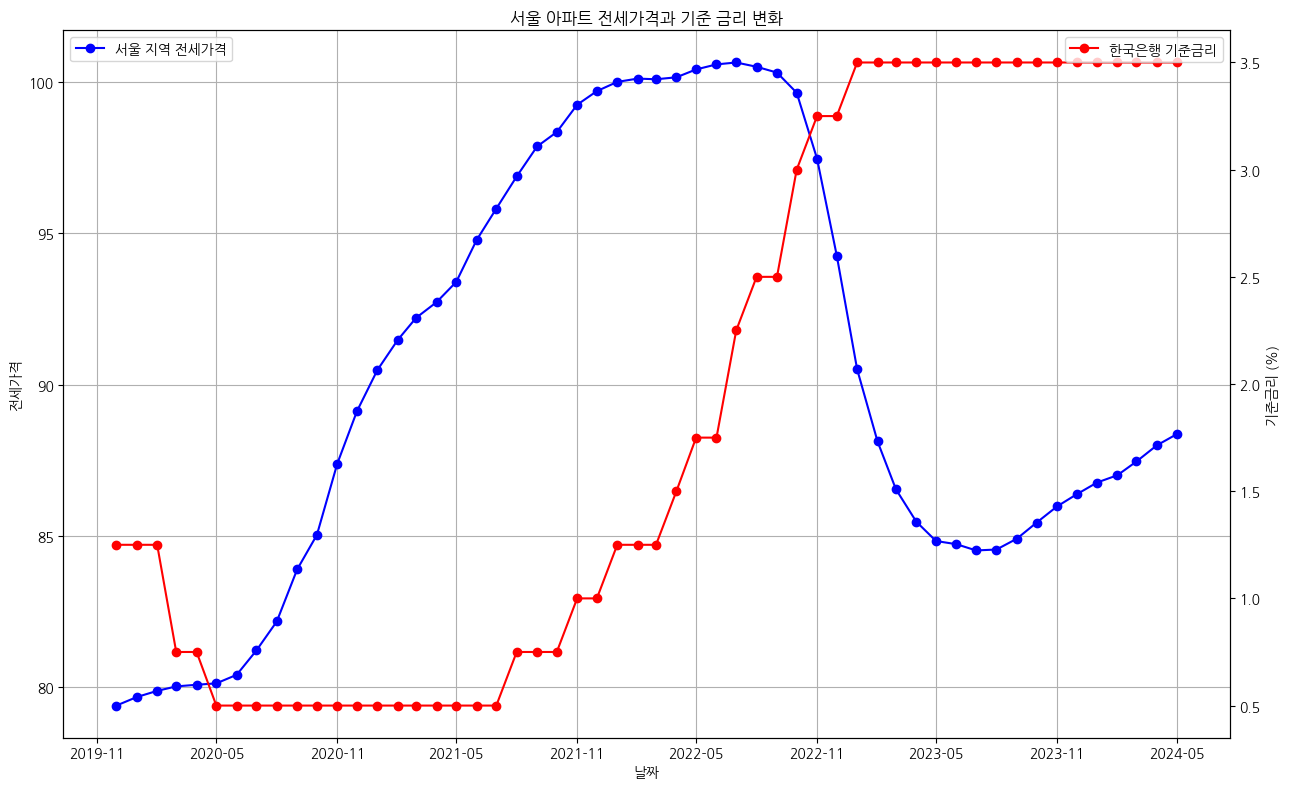

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 데이터 준비 - 선 그래프용 데이터
data1 = {
'Date': pd.date_range(start='2019-12-01', end='2024-05-01', freq='MS'),
'전세가격': [
79.399492, 79.681242, 79.884973, 80.032447, 80.087, 80.132809, 80.415524, 81.220105, 82.177054,
83.896087, 85.035048, 87.387632, 89.123855, 90.480045, 91.476134, 92.207568, 92.723002,
93.392746, 94.774128, 95.814962, 96.876152, 97.866394, 98.343551, 99.245559, 99.695779,
100, 100.109224, 100.087187, 100.152183, 100.411903, 100.578672, 100.641339, 100.499797,
100.308052, 99.64213, 97.462394, 94.259268, 90.50446, 88.124901, 86.543271, 85.473109,
84.834676, 84.729893, 84.52346, 84.553869, 84.91176, 85.442287, 85.975609, 86.378188,
86.766785, 87.008844, 87.462183, 87.996113, 88.360752
]
}

# 데이터프레임 생성 - 선 그래프용
df1 = pd.DataFrame(data1)
df1['Date'] = pd.to_datetime(df1['Date'])

# 데이터 준비 - 선 그래프용 데이터 (기준금리)
data2 = {
'Date': pd.date_range(start='2019-12-01', end='2024-05-01', freq='MS'),
'Interest Rate (%)': [
1.25, 1.25, 1.25, 0.75, 0.75, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.75, 0.75, 0.75, 1.0, 1.0, 1.25, 1.25, 1.25,
1.5, 1.75, 1.75, 2.25, 2.5, 2.5, 3.0, 3.25, 3.25, 3.5, 3.5, 3.5, 3.5, 3.5,
3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5
]
}

# 데이터프레임 생성 - 기준금리용
df2 = pd.DataFrame(data2)
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y/%m')

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(13, 8))

# 전세가격 선 그래프
ax1.plot(df1['Date'], df1['전세가격'], marker='o', linestyle='-', color='b', label='서울 지역 전세가격')
ax1.set_xlabel('날짜')
ax1.set_ylabel('전세가격', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True)
ax1.legend(loc='upper left')

# 기준금리 선 그래프
ax2 = ax1.twinx()
ax2.plot(df2['Date'], df2['Interest Rate (%)'], marker='o', linestyle='-', color='r', label='한국은행 기준금리')
ax2.set_ylabel('기준금리 (%)', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.grid(False) # 오른쪽 y축의 그리드는 필요 없으므로 False로 설정
ax2.legend(loc='upper right')

# 6개월 단위로 x축 눈금자 설정
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))

# 그래프 출력
plt.title('서울 아파트 전세가격과 기준 금리 변화')
plt.tight_layout()
plt.show()